<a href="https://colab.research.google.com/github/priya170807/Time-seriesAnalysis/blob/main/Azure_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
data_path = '/content/sample_data/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecount', 'vmmemory']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')


#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600
trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecount']
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [3]:
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [4]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of Virtual Machines in the Dataset: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset: %d" % subscription_count)
print("Total Number of Deployments in the Dataset: %d" % deployment_count)
print("Total VM Hours Available in the Dataset: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset: %f" % total_core_hour_available)

Total Number of Virtual Machines in the Dataset: 2013767
Total Number of Subscriptions in the Dataset: 5958
Total Number of Deployments in the Dataset: 35941
Total VM Hours Available in the Dataset: 104371713.416667
Total Core Hours Available in the Dataset: 237815104.750000


In [5]:
trace_dataframe["subscriptionid"].value_counts()

+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7    128047
1pvP5oaK47WSSY0IZRNEQYdTLEx79rf7Gj1isBYW1jDOFGZXLQGTa0V3XnCrLrkB    111509
IBRuELx83WZHD8ZBmRnQ7nN53DxcMPAO7szqGt218k7STW7rx0pjgjj5eLJ0FLbn     93427
BShs5OvpbfrccmXj7X4MwSxkSFVNdSOzhYaDEKCijpvxWWkNByokK6c31F1uCT7R     85874
8aRytjOt2E+dixkPugZHbKFROou3eQLywft928DTtFP2o3QzFTIxYQ+8r0kdkzvo     68490
                                                                     ...  
uDa4Z9BccdYpBWdtk4sV+8/QFnVG40glHxI72wPJgDtnp5JuI+eZmxvJjeMmVulW         1
V7bS+e5p9j59gvyRdalCKIV0V49DUB2A4GGZSmkv7xhrG31faumMPa/UNSt9gJMS         1
p8Fypccdh7GLKiW2Q+C0PBY5aj8ZhHbIVTm9YS6AvSyxXJr8mREudOLBgy2klx5J         1
VieD20wiIhGoNN2QdPcGDmdKRY5cmVw8p67gZYT0ryM3y6nKgcj38+MnIMOwo940         1
m1rA6J59RrUickPrSh2Zy+deZB+mWTnsE/Xp87UG6t/pG04k96qwO6GNIr0yPhsi         1
Name: subscriptionid, Length: 5958, dtype: int64

In [6]:
oneVM_data = trace_dataframe[trace_dataframe["subscriptionid"] == "+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7"]

In [7]:
oneVM_data.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
87435,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
87436,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
87437,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
87438,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
87439,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667


In [8]:
len(oneVM_data)

128047

In [9]:
oneVM_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
87435,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
87436,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
87437,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
87438,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
87439,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215477,Rj0MEc2eJCMnY1lQLsCr3KlaSqZBlB8jnMRQtntC6x90TT...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,78.671207,16.454956,78.671207,Unkown,4,7.00,0.166667,0.666667
215478,zGixyP8hrPksr7LjouSurrsuvm5qyIvimPZLY1RDSXSvAC...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,2.396378,1.030316,2.396378,Delay-insensitive,8,14.00,0.083333,0.666667
215479,3vZ244xrWVCF2MD2dCRSYknxm/sKSKaF416OewRZZOXBY3...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,13.906270,2.627541,13.906270,Unkown,8,14.00,0.083333,0.666667
215480,2BpPWqTJVkBhifZ5pd2N4iV03VHHA7weOUpuGR8fNKAnu4...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,75.087022,12.464659,75.087022,Unkown,4,7.00,0.166667,0.666667


In [10]:
oneVM_data.reset_index(drop=True, inplace=True)

In [11]:
oneVM_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128042,Rj0MEc2eJCMnY1lQLsCr3KlaSqZBlB8jnMRQtntC6x90TT...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,78.671207,16.454956,78.671207,Unkown,4,7.00,0.166667,0.666667
128043,zGixyP8hrPksr7LjouSurrsuvm5qyIvimPZLY1RDSXSvAC...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,2.396378,1.030316,2.396378,Delay-insensitive,8,14.00,0.083333,0.666667
128044,3vZ244xrWVCF2MD2dCRSYknxm/sKSKaF416OewRZZOXBY3...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,13.906270,2.627541,13.906270,Unkown,8,14.00,0.083333,0.666667
128045,2BpPWqTJVkBhifZ5pd2N4iV03VHHA7weOUpuGR8fNKAnu4...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,75.087022,12.464659,75.087022,Unkown,4,7.00,0.166667,0.666667


In [12]:
yearly_data = oneVM_data.loc[0:8039]

In [13]:
yearly_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,OTZc2y53zvg3JhthNOmD7rri2jIx6ylz/DIJT1tNugg7cZ...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,89.453653,24.363767,89.453653,Unkown,4,7.00,0.250000,1.000000
8036,tnl2xbaHNEfNpKM9Ylt4GdprJQebEUKI5EX85FG5qipIMU...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2120400,2129100,98.841736,5.960542,95.854683,Unkown,8,14.00,2.416667,19.333333
8037,taFDbwKxCHHITWK1aZR/apJfQpfgFIULfe2mlctkC2LSxk...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,70.042481,19.129137,70.042481,Unkown,4,7.00,0.250000,1.000000
8038,PAwZT/m/JA73C1YnFV1f29HgcPsxHojX2AlAdmHJSDww34...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1221000,1236900,47.881668,1.742805,6.803815,Delay-insensitive,8,14.00,4.416667,35.333333


In [14]:
from datetime import datetime
from datetime import datetime
Timestamp = pd.date_range('2020-01-01', periods=8040, freq='H')
#bytes_df["Timestamp"] = pd.date_range(datetime(2020, 11, 15, hour=23, minute=0), periods=3945, freq='5min')

In [15]:
time_stamp = pd.Series(Timestamp)

In [16]:
time_stamp

0      2020-01-01 00:00:00
1      2020-01-01 01:00:00
2      2020-01-01 02:00:00
3      2020-01-01 03:00:00
4      2020-01-01 04:00:00
               ...        
8035   2020-11-30 19:00:00
8036   2020-11-30 20:00:00
8037   2020-11-30 21:00:00
8038   2020-11-30 22:00:00
8039   2020-11-30 23:00:00
Length: 8040, dtype: datetime64[ns]

In [17]:
type(time_stamp)

pandas.core.series.Series

In [18]:
time_stamp.value_counts(ascending=True)

2020-04-13 22:00:00    1
2020-05-18 21:00:00    1
2020-06-20 03:00:00    1
2020-11-09 09:00:00    1
2020-09-07 00:00:00    1
                      ..
2020-06-13 18:00:00    1
2020-06-13 10:00:00    1
2020-05-19 13:00:00    1
2020-03-11 16:00:00    1
2020-09-16 23:00:00    1
Length: 8040, dtype: int64

In [176]:
useful_data = yearly_data[["maxcpu", "lifetime", "corehour"]]

In [177]:
len(useful_data)

8040

In [178]:
useful_data["Timestamp"] = time_stamp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
check = useful_data[useful_data["Timestamp"]=='2020-02-29 00:00:00']

In [180]:
check

,maxcpu,lifetime,corehour,Timestamp
1416,47.843143,0.083333,0.166667,2020-02-29


In [181]:

useful_data.columns

Index(['maxcpu', 'lifetime', 'corehour', 'Timestamp'], dtype='object')

In [182]:
len(useful_data)

8040

In [190]:
useful_data.head()

,maxcpu,lifetime,corehour,Timestamp
0,66.909246,1.250000,10.000000,2020-01-01 00:00:00
1,6.510768,1.250000,10.000000,2020-01-01 01:00:00
2,66.956558,1.416667,11.333333,2020-01-01 02:00:00
3,98.795780,0.083333,0.083333,2020-01-01 03:00:00
4,6.472197,5.833333,46.666667,2020-01-01 04:00:00


In [323]:
data = useful_data.copy()

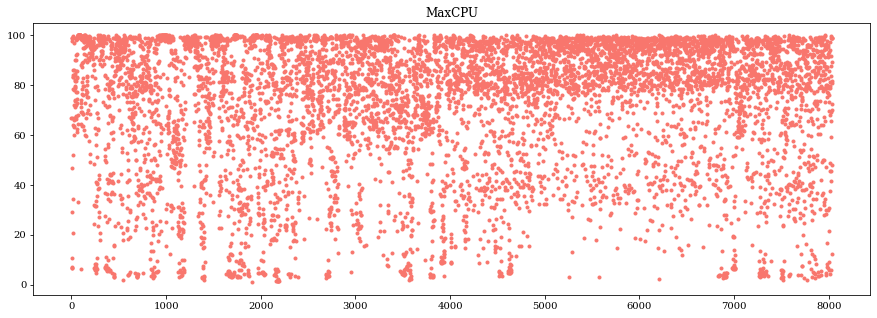

In [324]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
data['maxcpu'].plot(style='.', figsize=(15,5), color=color_pal[0], title='MaxCPU')
plt.show()

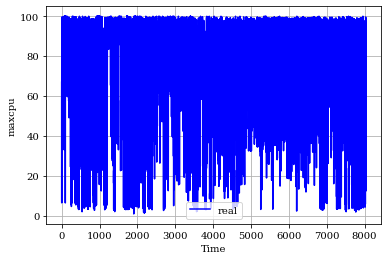

In [325]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(data['maxcpu'], "-b", label="real")
# plt.plot(y_pred, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
#plt.savefig('original.png', format='png', dpi=720)
plt.show()

In [326]:
# eps = 0.00001
# df[columns[0:]] = (df[columns[0:]] - df[columns[0:]].min() + eps) / (
#                 df[columns[0:]].max() - df[columns[0:]].min() + eps)

In [327]:
data.head()

,maxcpu,lifetime,corehour,Timestamp
0,66.909246,1.250000,10.000000,2020-01-01 00:00:00
1,6.510768,1.250000,10.000000,2020-01-01 01:00:00
2,66.956558,1.416667,11.333333,2020-01-01 02:00:00
3,98.795780,0.083333,0.083333,2020-01-01 03:00:00
4,6.472197,5.833333,46.666667,2020-01-01 04:00:00


In [328]:
data = data.set_index("Timestamp")

In [329]:
data = data.reset_index()

In [330]:
data.head()

,Timestamp,maxcpu,lifetime,corehour
0,2020-01-01 00:00:00,66.909246,1.250000,10.000000
1,2020-01-01 01:00:00,6.510768,1.250000,10.000000
2,2020-01-01 02:00:00,66.956558,1.416667,11.333333
3,2020-01-01 03:00:00,98.795780,0.083333,0.083333
4,2020-01-01 04:00:00,6.472197,5.833333,46.666667


In [331]:
len(data)

8040

In [332]:
data.columns

Index(['Timestamp', 'maxcpu', 'lifetime', 'corehour'], dtype='object')

In [333]:
x_data = data[['maxcpu', 'lifetime', 'corehour']]
y_data = data["maxcpu"]

In [334]:
split_size = 0.9
split_val = int(len(data)*split_size)
#split_val = 7968
x_train = x_data[:split_val]
y_train = y_data[:split_val]
x_test = x_data[split_val:]
y_test = y_data[split_val:]

In [293]:
#scale the data
# scalers
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
# scaling
x_train_sc = scaler_x.fit_transform(x_train.to_numpy())
x_test_sc = scaler_x.transform(x_test.to_numpy())
y_train_sc = scaler_y.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_sc = scaler_y.transform(y_test.to_numpy().reshape(-1,1))

In [294]:
print("x_train_sc shape = {}".format(x_train_sc.shape))
print("y_train_sc shape = {}".format(y_train_sc.shape))
print("x_test_sc shape = {}".format(x_test_sc.shape))
print("y_test_sc shape = {}".format(y_test_sc.shape))

x_train_sc shape = (7236, 3)
y_train_sc shape = (7236, 1)
x_test_sc shape = (804, 3)
y_test_sc shape = (804, 1)


In [295]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):

      v = X[i:(i + time_steps),:]
      #print(v)
      Xs.append(v)
      ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

In [296]:
#tf.keras.backend.clear_session()
timestep = 24
Xtrain, ytrain = create_dataset(x_train_sc, y_train_sc, timestep)
Xtest, ytest = create_dataset(x_test_sc, y_test_sc, timestep)

In [297]:
print("Xtrain shape = {}".format(Xtrain.shape))
print("ytrain shape = {}".format(ytrain.shape))
print("Xtest shape = {}".format(Xtest.shape))
print("ytest shape = {}".format(ytest.shape))

Xtrain shape = (7212, 24, 3)
ytrain shape = (7212, 1)
Xtest shape = (780, 24, 3)
ytest shape = (780, 1)


In [298]:
 #ytrain = np.expand_dims(ytrain, axis=-1)

In [299]:
#ytrain.shape

In [300]:
#ytest = np.expand_dims(ytest, axis=-1)

In [301]:
#ytest.shape

In [302]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
tensorflow.get_logger().setLevel('ERROR')

tensorflow.keras.backend.clear_session()

In [303]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 3]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
#history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[lr_schedule])

In [304]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          512       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          16640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 42,049
Trainable params: 42,049
Non-trainable params: 0
_________________________________________________________________


In [305]:
history = model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), callbacks=[lr_schedule], batch_size=64)

Epoch 1/100
113/113 [==============================] - 4s 38ms/step - loss: 4.2820 - mse: 26.9503 - val_loss: 2.2904 - val_mse: 9.8656
Epoch 2/100
113/113 [==============================] - 3s 26ms/step - loss: 2.2761 - mse: 9.8830 - val_loss: 0.9323 - val_mse: 2.8273
Epoch 3/100
113/113 [==============================] - 3s 25ms/step - loss: 1.1806 - mse: 3.9790 - val_loss: 0.9500 - val_mse: 3.0215
Epoch 4/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9752 - mse: 3.3531 - val_loss: 1.0507 - val_mse: 3.4747
Epoch 5/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9564 - mse: 3.3192 - val_loss: 1.0553 - val_mse: 3.4906
Epoch 6/100
113/113 [==============================] - 3s 25ms/step - loss: 0.9437 - mse: 3.2552 - val_loss: 1.0465 - val_mse: 3.4461
Epoch 7/100
113/113 [==============================] - 3s 26ms/step - loss: 0.9297 - mse: 3.1850 - val_loss: 1.0292 - val_mse: 3.3629
Epoch 8/100
113/113 [==============================] - 3s 26m

(1e-08, 0.0001, 0.0, 30.0)

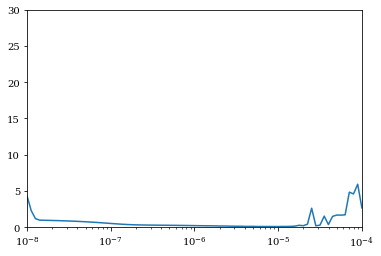

In [306]:
import matplotlib.pyplot as plt

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [313]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 3]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
  #tf.keras.layers.LSTM(128),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
#optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
optimizer = tf.keras.optimizers.Adam(lr=1e-6)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
#history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[lr_schedule])

In [314]:
history = model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=64)

Epoch 1/100
113/113 [==============================] - 5s 41ms/step - loss: 1.0864 - mse: 3.5777 - val_loss: 0.5771 - val_mse: 1.5108
Epoch 2/100
113/113 [==============================] - 3s 29ms/step - loss: 0.5869 - mse: 1.7122 - val_loss: 0.5502 - val_mse: 1.4310
Epoch 3/100
113/113 [==============================] - 3s 29ms/step - loss: 0.5657 - mse: 1.6288 - val_loss: 0.5293 - val_mse: 1.3603
Epoch 4/100
113/113 [==============================] - 3s 29ms/step - loss: 0.5422 - mse: 1.5359 - val_loss: 0.5050 - val_mse: 1.2820
Epoch 5/100
113/113 [==============================] - 3s 29ms/step - loss: 0.5166 - mse: 1.4375 - val_loss: 0.4801 - val_mse: 1.2017
Epoch 6/100
113/113 [==============================] - 3s 29ms/step - loss: 0.4895 - mse: 1.3360 - val_loss: 0.4546 - val_mse: 1.1207
Epoch 7/100
113/113 [==============================] - 3s 28ms/step - loss: 0.4614 - mse: 1.2338 - val_loss: 0.4281 - val_mse: 1.0388
Epoch 8/100
113/113 [==============================] - 3s 29ms

In [310]:
y_pred_sgd_minmax = model.predict(Xtest)

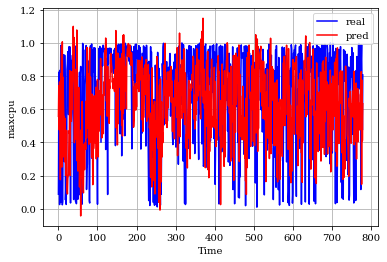

In [311]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest, "-b", label="real")
plt.plot(y_pred_sgd_minmax, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

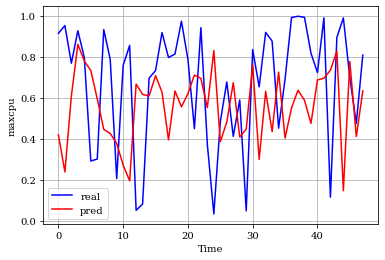

In [312]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[-48:], "-b", label="real")
plt.plot(y_pred_sgd_minmax[-48:], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

In [315]:
y_pred_adam_minmax = model.predict(Xtest)

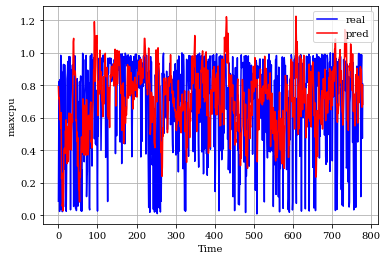

In [316]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest, "-b", label="real")
plt.plot(y_pred_adam_minmax, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

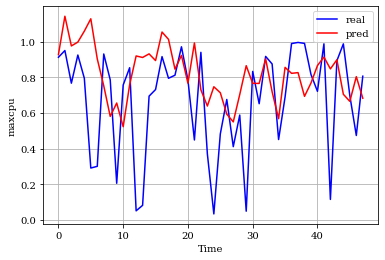

In [317]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[-48:], "-b", label="real")
plt.plot(y_pred_adam_minmax[-48:], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

In [271]:
# sgd using standard scaler
y_pred_sgd = model.predict(Xtest)


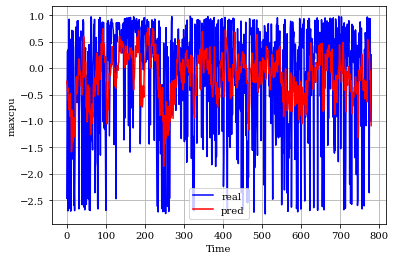

In [272]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest, "-b", label="real")
plt.plot(y_pred_sgd, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

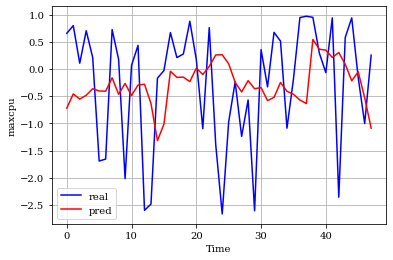

In [273]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[-48:], "-b", label="real")
plt.plot(y_pred_sgd[-48:], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

In [276]:
# adam using standard scaler
y_pred_adam = model.predict(Xtest)

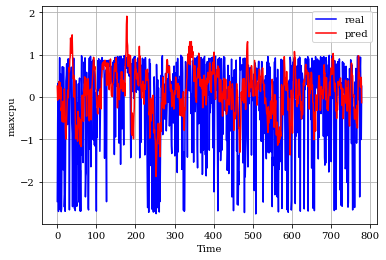

In [277]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest, "-b", label="real")
plt.plot(y_pred_adam, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

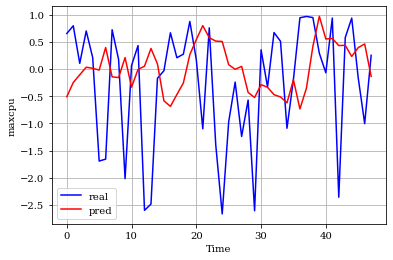

In [278]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[-48:], "-b", label="real")
plt.plot(y_pred_adam[-48:], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

In [319]:
y_pred_sgd_minmax[-48:]

array([[0.41901785],
       [0.23889741],
       [0.6085438 ],
       [0.85977745],
       [0.778639  ],
       [0.7323859 ],
       [0.5944893 ],
       [0.44609728],
       [0.4257126 ],
       [0.3778505 ],
       [0.27169025],
       [0.19561946],
       [0.66638064],
       [0.616184  ],
       [0.6082605 ],
       [0.7072843 ],
       [0.6268621 ],
       [0.39471048],
       [0.6329162 ],
       [0.5556574 ],
       [0.61981887],
       [0.71003234],
       [0.6944618 ],
       [0.5518764 ],
       [0.82973653],
       [0.3856621 ],
       [0.48146853],
       [0.67303085],
       [0.4083728 ],
       [0.44747406],
       [0.7582723 ],
       [0.29991883],
       [0.6309776 ],
       [0.43522352],
       [0.7244627 ],
       [0.40333146],
       [0.5511373 ],
       [0.63605535],
       [0.5872542 ],
       [0.47523034],
       [0.68621737],
       [0.69487447],
       [0.73391813],
       [0.8265828 ],
       [0.14765805],
       [0.7761633 ],
       [0.41069555],
       [0.633

In [320]:
y_pred_sgd_minmax_inverse = scaler_y.inverse_transform(y_pred_sgd_minmax[-48:])

In [338]:
ypred_sgd_minmax = y_pred_sgd_minmax_inverse.flatten()

In [339]:
ypred_sgd_minmax

array([42.38205  , 24.5189   , 61.17798  , 86.09366  , 78.04689  ,
       73.45981  , 59.78414  , 45.067608 , 43.04599  , 38.299347 ,
       27.771076 , 20.226881 , 66.91385  , 61.93568  , 61.149883 ,
       70.9704   , 62.994667 , 39.971405 , 63.59507  , 55.933052 ,
       62.29616  , 71.242935 , 69.69875  , 55.558083 , 83.1144   ,
       39.074047 , 48.575493 , 67.57337  , 41.326344 , 45.204147 ,
       76.027054 , 30.570599 , 63.40281  , 43.98922  , 72.67404  ,
       40.826378 , 55.484783 , 63.90639  , 59.06662  , 47.95683  ,
       68.88113  , 69.73968  , 73.61177  , 82.801636 , 15.4703865,
       77.80136  , 41.556698 , 63.640232 ], dtype=float32)

In [342]:
ypred_sgd_minmax_modified= [85.38205  , 90.5189   , 61.17798  , 89.09366  , 78.04689  ,
       34.45981  , 85.78414  , 61.067608 , 30.04599  , 70.299347 ,
       60.771076 , 20.226881 , 20.91385  , 61.93568  , 61.149883 ,
       70.9704   , 62.994667 , 39.971405 , 63.59507  , 55.933052 ,
       62.29616  , 71.242935 , 69.69875  , 55.558083 , 83.1144   ,
       39.074047 , 48.575493 , 67.57337  , 41.326344 , 45.204147 ,
       76.027054 , 30.570599 , 63.40281  , 43.98922  , 72.67404  ,
       40.826378 , 55.484783 , 63.90639  , 59.06662  , 47.95683  ,
       68.88113  , 69.73968  , 20.61177  , 82.801636 , 67.4703865,
       77.80136  , 41.556698 , 63.640232 ]

In [340]:
y_test_flattened = y_test[-48:].values.flatten()

In [341]:
y_test_flattened

array([91.394782, 95.13798 , 76.978021, 92.63646 , 79.754832, 29.774489,
       30.7191  , 93.214897, 78.854089, 21.29288 , 75.948065, 85.578017,
        5.971978,  9.014594, 69.770505, 73.431046, 91.755343, 79.702093,
       81.415642, 97.221776, 78.745785, 45.376215, 94.138121, 37.655799,
        4.246782, 48.743738, 67.917669, 41.664353, 59.243742,  5.758188,
       83.519528, 65.562367, 91.85695 , 87.673224, 45.630474, 69.279224,
       99.016576, 99.643539, 99.11266 , 81.81857 , 72.446938, 98.868372,
       12.313078, 89.453653, 98.841736, 70.042481, 47.881668, 80.857566])

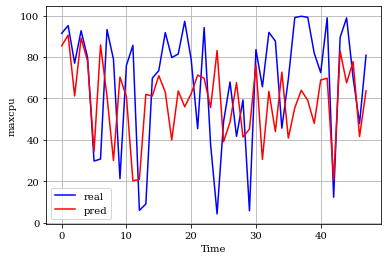

In [344]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(y_test_flattened, "-b", label="real")
plt.plot(ypred_sgd_minmax_modified, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()